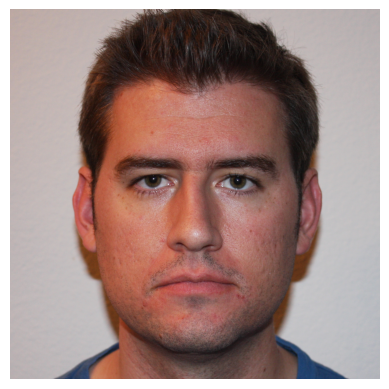

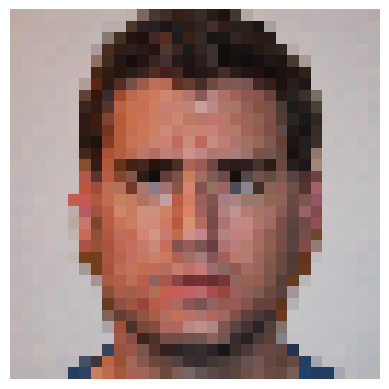

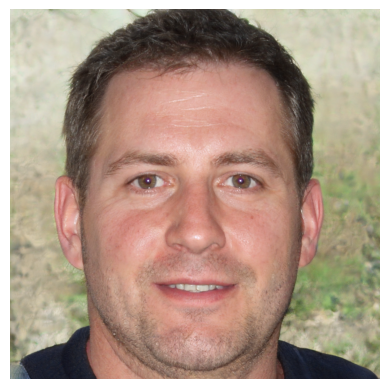

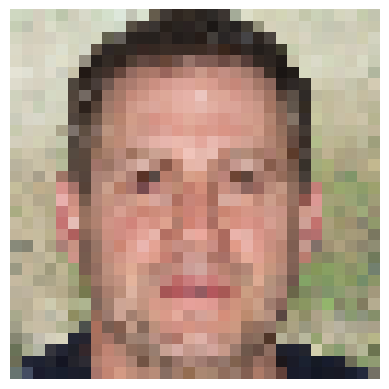

In [1]:
import cv2
import matplotlib.pyplot as plt

real_img = cv2.imread("Real faces/1.R.W.M.png")
real_img_rgb = cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB)

fake_img = cv2.imread("Synthetic faces/1.S.W.M.png")
fake_img_rgb = cv2.cvtColor(fake_img, cv2.COLOR_BGR2RGB)

dim = 32

real_reduced = cv2.resize(real_img_rgb, (dim, dim))
fake_reduced = cv2.resize(fake_img_rgb, (dim, dim))

plt.imshow(real_img_rgb)
plt.axis("off")
plt.show()

plt.imshow(real_reduced)
plt.axis("off")
plt.show()

plt.imshow(fake_img_rgb)
plt.axis("off")
plt.show()

plt.imshow(fake_reduced)
plt.axis("off")
plt.show()

In [2]:
from prob_graph_conversion import convert_to_graph

real_g = convert_to_graph("Real faces/1.R.W.M.png", dim, 0.05)
fake_g = convert_to_graph("Synthetic faces/1.S.W.M.png", dim, 0.05)

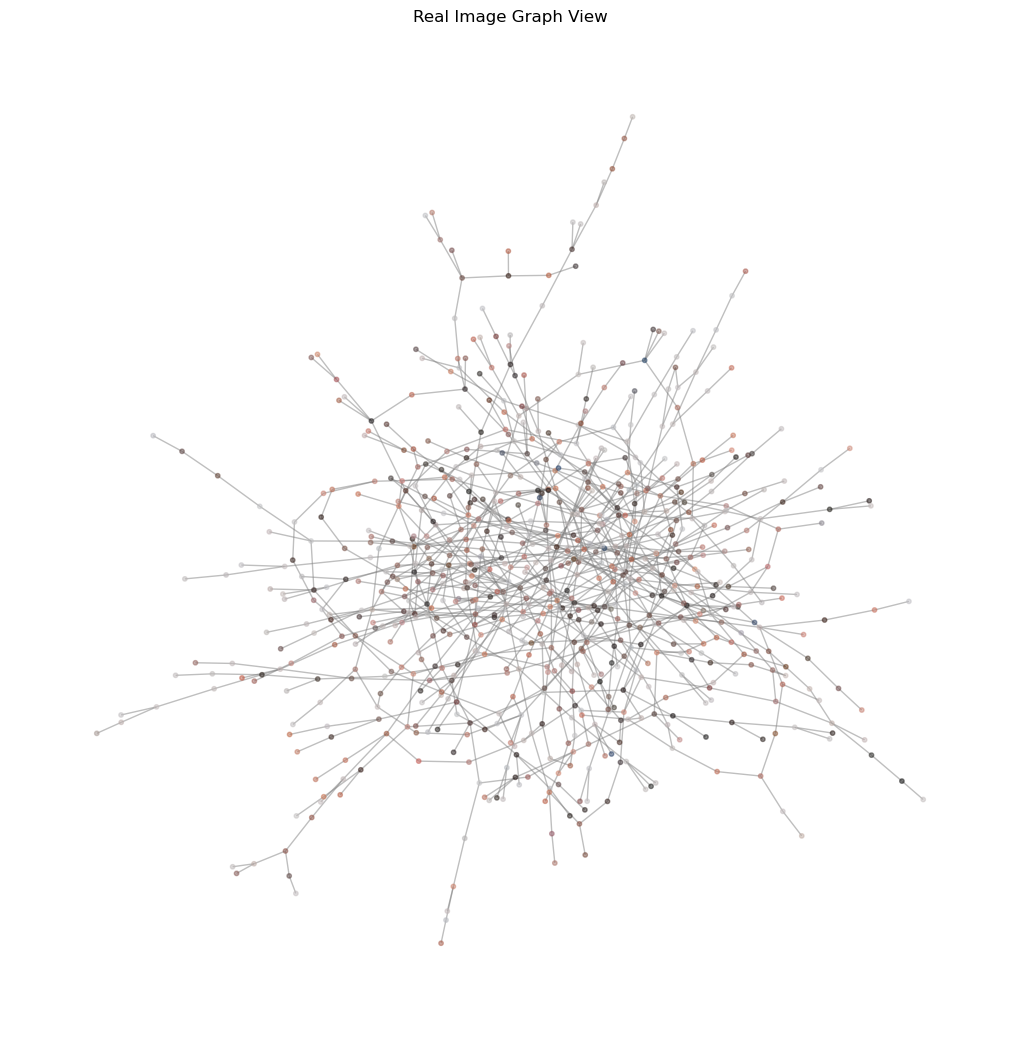

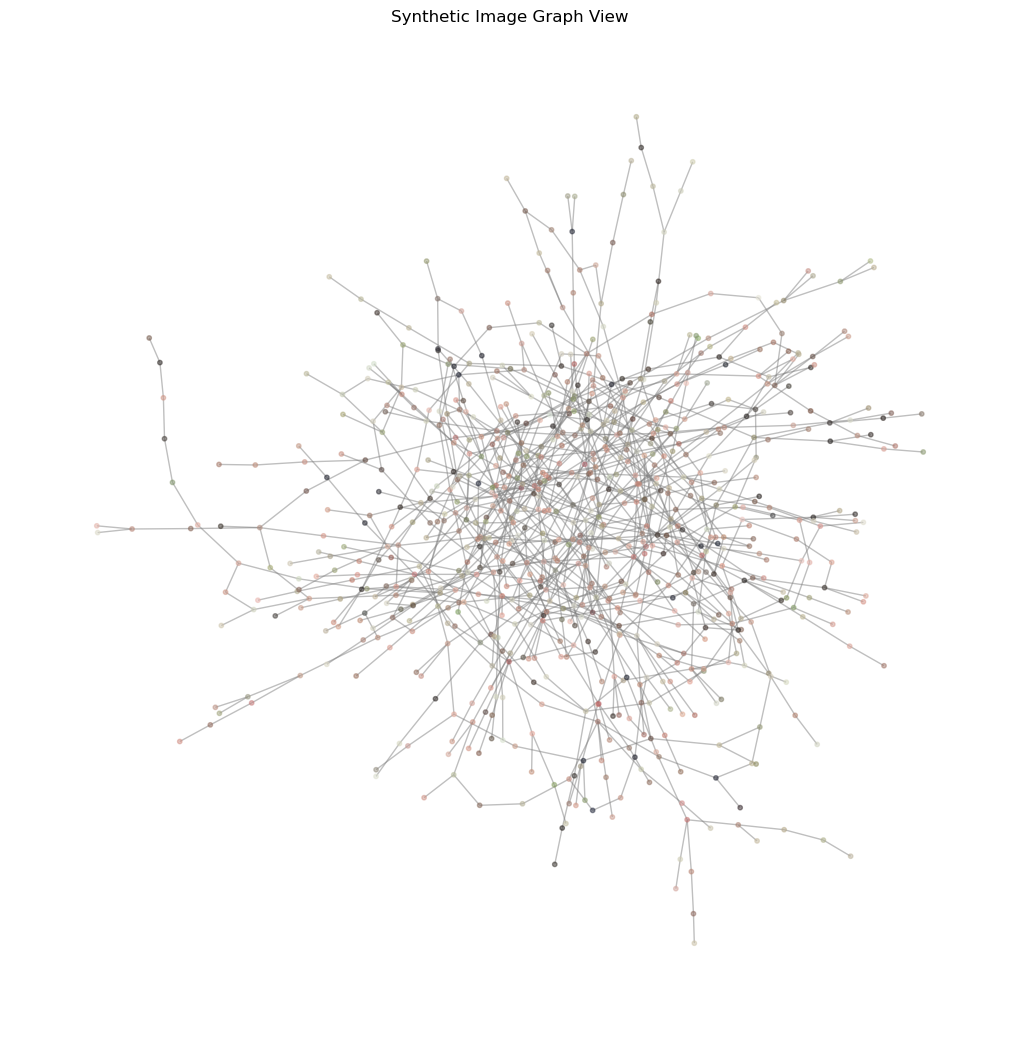

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
from weight_graph_conversion import get_coordinates

real_c = max(nx.connected_components(real_g), key=len).copy()
real_sub = real_g.subgraph(real_c).copy()

real_pos = nx.spring_layout(real_sub)

real_colors = []
for node in real_sub.nodes():
    real_colors.append(real_reduced[get_coordinates(node, dim)]/255)

fake_c = max(nx.connected_components(fake_g), key=len).copy()
fake_sub = fake_g.subgraph(fake_c).copy()

fake_pos = nx.spring_layout(fake_sub)

fake_colors = []
for node in fake_sub.nodes():
    fake_colors.append(fake_reduced[get_coordinates(node, dim)]/255)

plt.figure(figsize=(10, 10))
nx.draw(real_sub, real_pos, node_size=10, edge_color='gray', node_color=real_colors, alpha=0.5)
plt.title("Real Image Graph View")
plt.axis("off")
plt.show()

plt.figure(figsize=(10, 10))
nx.draw(fake_sub, fake_pos, node_size=10, edge_color='gray', node_color=fake_colors, alpha=0.5)
plt.title("Synthetic Image Graph View")
plt.axis("off")
plt.show()
